# Mynt Advanced Analytics Project for Senior ML Engineers - Chor Eduarte

#### change logs: 
*    mk01:
    * basic 
*    mk02:  
    * add table of contents
    * parse date
    * preprocessing
* mk03: creating models
    * Neural net
    * Decision Trees
    * XGBoost
* mk04: improving the model by adding features
    * merging sales and train dataset

### Table of Contents <a class="anchor" id="toc"></a>

* [Problem Definition](#problemDefinition)
* [Reading the data](#readingTheData)
* [Data Exploration and Visualization](#EDA)
* [Data Pre-processing](#preprocessing)
* [Data Partition](#dataPartition)
* [Fit Model](#fitModel)
    * [Neural Network](#neural)
    * [Random Forest](#randomForest)
    * [XGBoost](#xgboost)
* [Model Evaluation](#modelEvaluation)

## Problem Definition
* [back to toc](#toc)

Rossmann is Germany's second-largest drug store chain. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column. Note that some stores in the dataset were temporarily closed for refurbishment

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

## Reading the data <a class="anchor" id="readingTheData"></a>
* [back to toc](#toc)

In [2]:
dataset = pd.read_csv('./dataset/train.csv',parse_dates=[2])
df_store = pd.read_csv('./dataset/store.csv')

C:\Users\reved\AppData\Local\Temp\ipykernel_9360\3423031158.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./dataset/train.csv',parse_dates=[2])


In [3]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0
...,...,...,...,...,...,...,...,...,...
914624,1111,2,2013-01-01,0,0,0,0,a,1
914625,1112,2,2013-01-01,0,0,0,0,a,1
914626,1113,2,2013-01-01,0,0,0,0,a,1
914627,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## DATA EXPLORATION AND VISUALIZATION <a class="anchor" id="EDA"></a>
* [back to toc](#toc)

In [5]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0


In [6]:
dataset.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
914624,1111,2,2013-01-01,0,0,0,0,a,1
914625,1112,2,2013-01-01,0,0,0,0,a,1
914626,1113,2,2013-01-01,0,0,0,0,a,1
914627,1114,2,2013-01-01,0,0,0,0,a,1
914628,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
dataset.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [8]:
#check for null values
dataset.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Luckily we do not have null values in our dataset :)

In [9]:
#check the correlation for the data
dataset.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005667,0.024734,-0.000129,0.000068,0.000041
DayOfWeek,-0.000008,1.000000,-0.461340,-0.386934,-0.530936,-0.393894,-0.205699
Sales,0.005667,-0.461340,1.000000,0.896073,0.675924,0.454348,0.076103
Customers,0.024734,-0.386934,0.896073,1.000000,0.615638,0.318701,0.064592
Open,-0.000129,-0.530936,0.675924,0.615638,1.000000,0.297299,0.075490
Promo,0.000068,-0.393894,0.454348,0.318701,0.297299,1.000000,0.055323
SchoolHoliday,0.000041,-0.205699,0.076103,0.064592,0.075490,0.055323,1.000000


<AxesSubplot:>

<Figure size 1440x1872 with 0 Axes>

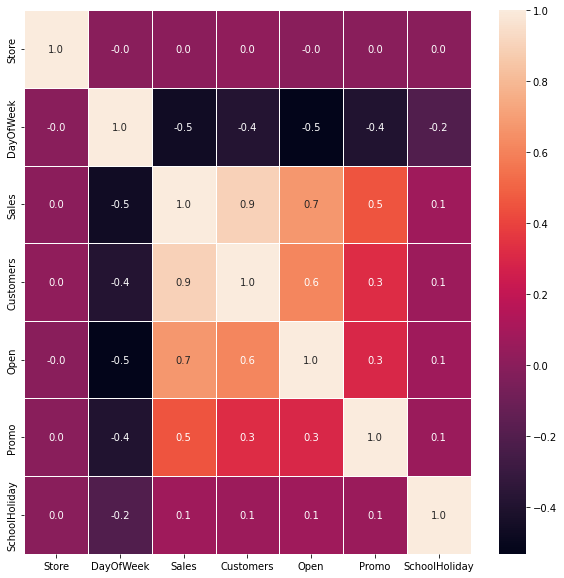

In [10]:
fig = plt.figure(figsize=(20,26))

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

We can see in our heatmap that <b>Sales</b> is directly proportional with <b>Customers</b> with 0.9 score. Next is <b>Open</b>, with 0.7.

Another notable correlation is <b>Promo</b> which is likely to increase <b>Sales</b>

In [11]:
dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000
mean,558.477923,3.996935,5755.722525,634.081021,0.830830,0.380417,0.180269
std,321.912653,1.998012,3842.448149,464.756658,0.374902,0.485489,0.384411
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3711.000000,404.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5715.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7826.000000,839.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,38722.000000,7388.000000,1.000000,1.000000,1.000000


In [12]:
# sns.scatterplot(data=dataset, x="DayOfWeek", y="Sales", hue="Promo")

## Data Pre-processing<a class="anchor" id="preprocessing"></a>
* [back to toc](#toc)

In [13]:
dataset.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [41]:
{ "Store":1111, "DayOfWeek":4, "Date":"2014-07-10", "Customers":410, "Open":1, "Promo":0, "StateHoliday":"0", "SchoolHoliday":1 }

{'Store': 1111,
 'DayOfWeek': 4,
 'Date': '2014-07-10',
 'Customers': 410,
 'Open': 1,
 'Promo': 0,
 'StateHoliday': '0',
 'SchoolHoliday': 1}

In [74]:
from datetime import datetime
date_string = "2014-07-10"
datetime = datetime.strptime(date_string, '%Y-%m-%d')
datetime.isocalendar().year

2014

In [58]:
date="2014-07-10"

In [76]:
datetime.

AttributeError: 'datetime.datetime' object has no attribute 'week'

In [68]:
        month = date.dt.month
        year = date.dt.year
        day = date.dt.day
        weekOfYear = date.dt.

AttributeError: 'str' object has no attribute 'dt'

In [56]:
dataset['Month'] = dataset.Date.dt.month
dataset['Year'] = dataset.Date.dt.year
dataset['Day'] = dataset.Date.dt.day
dataset['WeekOfYear'] = dataset.Date.dt.week

C:\Users\reved\AppData\Local\Temp\ipykernel_9360\2098506717.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['WeekOfYear'] = dataset.Date.dt.week


In [15]:
#check unique values for StateHoliday column
dataset['StateHoliday'].unique()

array(['0', 'b', 'a', 'c', 0], dtype=object)

In [16]:
#perform encoding on StateHoliday column

dataset.loc[dataset['StateHoliday'] == '0', 'StateHoliday'] = 0
dataset.loc[dataset['StateHoliday'] == 'a', 'StateHoliday'] = 1
dataset.loc[dataset['StateHoliday'] == 'b', 'StateHoliday'] = 2
dataset.loc[dataset['StateHoliday'] == 'c', 'StateHoliday'] = 3

In [17]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,WeekOfYear
0,1,4,2015-04-30,6228,650,1,1,0,0,4,2015,30,18
1,2,4,2015-04-30,6884,716,1,1,0,0,4,2015,30,18
2,3,4,2015-04-30,9971,979,1,1,0,0,4,2015,30,18
3,4,4,2015-04-30,16106,1854,1,1,0,0,4,2015,30,18
4,5,4,2015-04-30,6598,729,1,1,0,0,4,2015,30,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914624,1111,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1
914625,1112,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1
914626,1113,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1
914627,1114,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1


In [18]:
dataset['StateHoliday'] = dataset['StateHoliday'].astype(int)
dataset['WeekOfYear'] = dataset['WeekOfYear'].astype(int)

In [19]:
X = dataset.iloc[:,[0,1,4,5,6,7,8,9,10,11,12]]
y = dataset.iloc[:,[3]]

In [20]:
X.dtypes

Store            int64
DayOfWeek        int64
Customers        int64
Open             int64
Promo            int64
StateHoliday     int32
SchoolHoliday    int64
Month            int64
Year             int64
Day              int64
WeekOfYear       int32
dtype: object

## Data Partition<a class="anchor" id="dataPartition"></a>
* [back to toc](#toc)

    

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [22]:
X_train

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,WeekOfYear
0,1,4,650,1,1,0,0,4,2015,30,18
1,2,4,716,1,1,0,0,4,2015,30,18
2,3,4,979,1,1,0,0,4,2015,30,18
3,4,4,1854,1,1,0,0,4,2015,30,18
4,5,4,729,1,1,0,0,4,2015,30,18
...,...,...,...,...,...,...,...,...,...,...,...
731698,1044,5,758,1,0,0,0,6,2013,14,24
731699,1045,5,980,1,0,0,0,6,2013,14,24
731700,1046,5,689,1,0,0,0,6,2013,14,24
731701,1047,5,529,1,0,0,0,6,2013,14,24


In [23]:
y_train

,Sales
0,6228
1,6884
2,9971
3,16106
4,6598
...,...
731698,5022
731699,7635
731700,7641
731701,4658


## Fit Model<a class="anchor" id="fitModel"></a>
* [back to toc](#toc)

### Neural Network<a class="anchor" id="neural"></a>
* [back to toc](#toc)

In [24]:
# from keras.models import Sequential
# from keras.layers import Dense
# from numpy import asarray

In [25]:
# # get the model
# def get_model(n_inputs, n_outputs):
#     model = Sequential()
#     model.add(Dense(100, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
#     model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
#     model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
#     model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
#     model.compile(loss='mae', optimizer='adam',metrics='accuracy')
#     return model

In [26]:
# # load dataset
# n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# # get model
# model = get_model(n_inputs, n_outputs)
# # fit the model on all data
# # model.fit(X_train, y_train, verbose=1, epochs=100)


### Random Forest<a class="anchor" id="randomForest"></a>
* [back to toc](#toc)

In [27]:
# from sklearn.ensemble import RandomForestRegressor

In [28]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from math import sqrt

In [29]:
# # Random Forest

# rf_params = {
#     'n_estimators': 100,
#     'criterion': 'absolute_error'
# }

# rf = RandomForestRegressor(**`rf_params)

# rf.fit(X_train, y_train.values.ravel())



In [30]:
# rf_preds_train = rf.predict(X_train)


In [31]:
# rf_preds_val = rf.predict(X_test)


In [32]:
# train_mae_values['rf'] = mean_absolute_error(y_true=y_train, y_pred=rf_preds_train)
# val_mae_values['rf'] = mean_absolute_error(y_true=y_val, y_pred=rf_preds_val)

In [33]:
# #Random Forest

# yrf_pred = rf.predict(x_train)

# print('Mean Absolute Error = {}'.format(mean_absolute_error(y_train, yrf_pred)))
# print('Root Mean Squared Error = {}'.format(sqrt(mean_squared_error(y_train, yrf_pred))))
# print('R Squared Score = {}'.format(r2_score(y_train, yrf_pred)))

### XGBoost<a class="anchor" id="xgboost"></a>
* [back to toc](#toc)

In [34]:
from xgboost import XGBRegressor 
from sklearn.metrics import accuracy_score

C:\Users\reved\anaconda3\envs\gcashEnv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [35]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


In [36]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)


C:\Users\reved\anaconda3\envs\gcashEnv\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-rmse:6319.23145	validation_1-rmse:5987.35156
[1]	validation_0-rmse:5774.30322	validation_1-rmse:5464.38232
[2]	validation_0-rmse:5232.59033	validation_1-rmse:4938.86328
[3]	validation_0-rmse:4802.33838	validation_1-rmse:4530.17725
[4]	validation_0-rmse:4361.41602	validation_1-rmse:4101.50879
[5]	validation_0-rmse:4026.12915	validation_1-rmse:3787.82495
[6]	validation_0-rmse:3726.52661	validation_1-rmse:3505.47339
[7]	validation_0-rmse:3402.49927	validation_1-rmse:3188.91626
[8]	validation_0-rmse:3115.18726	validation_1-rmse:2909.19629
[9]	validation_0-rmse:2910.77197	validation_1-rmse:2718.81958
[10]	validation_0-rmse:2748.29443	validation_1-rmse:2567.53955
[11]	validation_0-rmse:2591.64160	validation_1-rmse:2423.53516
[12]	validation_0-rmse:2397.98071	validation_1-rmse:2235.74048
[13]	validation_0-rmse:2281.84766	validation_1-rmse:2130.53491
[14]	validation_0-rmse:2127.02026	validation_1-rmse:1981.02283
[15]	validation_0-rmse:1991.92468	validation_1-rmse:1850.71753
[1

[132]	validation_0-rmse:895.38300	validation_1-rmse:879.65778
[133]	validation_0-rmse:895.06360	validation_1-rmse:879.59491
[134]	validation_0-rmse:892.56189	validation_1-rmse:877.18372
[135]	validation_0-rmse:890.15533	validation_1-rmse:874.38800
[136]	validation_0-rmse:888.16132	validation_1-rmse:872.34815
[137]	validation_0-rmse:887.80530	validation_1-rmse:872.13538
[138]	validation_0-rmse:885.83472	validation_1-rmse:870.21020
[139]	validation_0-rmse:885.48724	validation_1-rmse:869.46112
[140]	validation_0-rmse:881.95349	validation_1-rmse:866.15411
[141]	validation_0-rmse:879.20703	validation_1-rmse:863.66821
[142]	validation_0-rmse:878.86890	validation_1-rmse:863.01801
[143]	validation_0-rmse:877.14960	validation_1-rmse:861.45361
[144]	validation_0-rmse:876.85516	validation_1-rmse:861.46582
[145]	validation_0-rmse:871.88055	validation_1-rmse:857.09009
[146]	validation_0-rmse:871.27960	validation_1-rmse:856.50195
[147]	validation_0-rmse:869.19092	validation_1-rmse:854.55206
[148]	va

[265]	validation_0-rmse:713.71228	validation_1-rmse:720.78827
[266]	validation_0-rmse:712.26202	validation_1-rmse:719.60358
[267]	validation_0-rmse:711.93756	validation_1-rmse:719.30548
[268]	validation_0-rmse:711.83472	validation_1-rmse:719.24420
[269]	validation_0-rmse:711.62683	validation_1-rmse:719.21722
[270]	validation_0-rmse:709.67377	validation_1-rmse:717.47058
[271]	validation_0-rmse:708.00440	validation_1-rmse:716.05945
[272]	validation_0-rmse:706.92505	validation_1-rmse:715.12775
[273]	validation_0-rmse:704.02154	validation_1-rmse:712.81360
[274]	validation_0-rmse:703.55164	validation_1-rmse:712.51935
[275]	validation_0-rmse:701.36792	validation_1-rmse:710.73383
[276]	validation_0-rmse:700.68158	validation_1-rmse:710.14239
[277]	validation_0-rmse:699.17908	validation_1-rmse:708.93561
[278]	validation_0-rmse:696.63043	validation_1-rmse:706.67426
[279]	validation_0-rmse:696.50989	validation_1-rmse:706.72205
[280]	validation_0-rmse:696.39435	validation_1-rmse:706.74994
[281]	va

[398]	validation_0-rmse:603.64807	validation_1-rmse:634.84967
[399]	validation_0-rmse:603.37433	validation_1-rmse:634.68878
[400]	validation_0-rmse:602.44543	validation_1-rmse:633.94989
[401]	validation_0-rmse:602.37750	validation_1-rmse:633.91827
[402]	validation_0-rmse:601.82849	validation_1-rmse:633.49304
[403]	validation_0-rmse:601.80762	validation_1-rmse:633.48981
[404]	validation_0-rmse:600.84308	validation_1-rmse:632.74707
[405]	validation_0-rmse:599.29980	validation_1-rmse:631.61017
[406]	validation_0-rmse:598.02863	validation_1-rmse:630.57867
[407]	validation_0-rmse:597.96283	validation_1-rmse:630.53583
[408]	validation_0-rmse:597.52844	validation_1-rmse:630.23645
[409]	validation_0-rmse:596.61212	validation_1-rmse:629.46399
[410]	validation_0-rmse:595.38501	validation_1-rmse:628.62195
[411]	validation_0-rmse:594.91077	validation_1-rmse:628.35968
[412]	validation_0-rmse:594.78143	validation_1-rmse:628.44562
[413]	validation_0-rmse:593.67847	validation_1-rmse:627.58099
[414]	va

[531]	validation_0-rmse:535.18085	validation_1-rmse:583.33978
[532]	validation_0-rmse:535.15045	validation_1-rmse:583.29602
[533]	validation_0-rmse:534.40338	validation_1-rmse:582.73792
[534]	validation_0-rmse:533.59528	validation_1-rmse:582.06867
[535]	validation_0-rmse:532.88946	validation_1-rmse:581.54333
[536]	validation_0-rmse:531.81122	validation_1-rmse:580.85352
[537]	validation_0-rmse:530.93585	validation_1-rmse:580.26648
[538]	validation_0-rmse:530.52741	validation_1-rmse:579.85211
[539]	validation_0-rmse:529.55670	validation_1-rmse:579.09656
[540]	validation_0-rmse:528.78833	validation_1-rmse:578.48035
[541]	validation_0-rmse:528.30005	validation_1-rmse:578.05182
[542]	validation_0-rmse:527.62378	validation_1-rmse:577.59943
[543]	validation_0-rmse:526.56580	validation_1-rmse:576.70654
[544]	validation_0-rmse:526.52374	validation_1-rmse:576.69061
[545]	validation_0-rmse:526.03156	validation_1-rmse:576.37640
[546]	validation_0-rmse:525.97992	validation_1-rmse:576.31451
[547]	va

[664]	validation_0-rmse:483.73450	validation_1-rmse:546.48846
[665]	validation_0-rmse:483.41068	validation_1-rmse:546.28674
[666]	validation_0-rmse:482.74823	validation_1-rmse:545.67255
[667]	validation_0-rmse:482.37305	validation_1-rmse:545.39203
[668]	validation_0-rmse:481.80225	validation_1-rmse:545.04608
[669]	validation_0-rmse:481.41348	validation_1-rmse:544.82080
[670]	validation_0-rmse:480.96542	validation_1-rmse:544.50824
[671]	validation_0-rmse:480.48630	validation_1-rmse:544.04724
[672]	validation_0-rmse:479.74786	validation_1-rmse:543.56213
[673]	validation_0-rmse:479.48477	validation_1-rmse:543.42340
[674]	validation_0-rmse:479.02350	validation_1-rmse:543.19574
[675]	validation_0-rmse:478.74014	validation_1-rmse:543.08960
[676]	validation_0-rmse:478.68622	validation_1-rmse:543.36047
[677]	validation_0-rmse:478.32291	validation_1-rmse:543.12317
[678]	validation_0-rmse:478.29605	validation_1-rmse:543.03027
[679]	validation_0-rmse:477.67157	validation_1-rmse:542.41803
[680]	va

[796]	validation_0-rmse:448.32083	validation_1-rmse:522.37280
[797]	validation_0-rmse:448.26209	validation_1-rmse:522.34473
[798]	validation_0-rmse:447.88571	validation_1-rmse:522.17767
[799]	validation_0-rmse:447.75745	validation_1-rmse:521.93713
[800]	validation_0-rmse:447.55267	validation_1-rmse:521.82983
[801]	validation_0-rmse:447.51965	validation_1-rmse:521.77496
[802]	validation_0-rmse:447.33359	validation_1-rmse:521.70343
[803]	validation_0-rmse:446.98779	validation_1-rmse:521.55164
[804]	validation_0-rmse:446.81601	validation_1-rmse:521.37903
[805]	validation_0-rmse:446.52536	validation_1-rmse:521.24616
[806]	validation_0-rmse:446.43628	validation_1-rmse:521.17725
[807]	validation_0-rmse:446.24301	validation_1-rmse:521.02893
[808]	validation_0-rmse:446.02252	validation_1-rmse:520.88995
[809]	validation_0-rmse:445.53873	validation_1-rmse:520.55890
[810]	validation_0-rmse:445.31430	validation_1-rmse:520.38898
[811]	validation_0-rmse:445.06021	validation_1-rmse:520.23279
[812]	va

[929]	validation_0-rmse:422.34744	validation_1-rmse:506.34354
[930]	validation_0-rmse:422.31708	validation_1-rmse:506.30896
[931]	validation_0-rmse:422.28531	validation_1-rmse:506.27277
[932]	validation_0-rmse:422.17426	validation_1-rmse:506.22870
[933]	validation_0-rmse:422.10965	validation_1-rmse:506.22296
[934]	validation_0-rmse:421.96509	validation_1-rmse:506.14603
[935]	validation_0-rmse:421.83978	validation_1-rmse:506.08932
[936]	validation_0-rmse:421.80402	validation_1-rmse:506.10431
[937]	validation_0-rmse:421.35330	validation_1-rmse:505.79965
[938]	validation_0-rmse:420.98120	validation_1-rmse:505.55994
[939]	validation_0-rmse:420.97125	validation_1-rmse:505.57275
[940]	validation_0-rmse:420.72403	validation_1-rmse:505.39905
[941]	validation_0-rmse:420.51483	validation_1-rmse:505.26337
[942]	validation_0-rmse:420.34528	validation_1-rmse:505.20477
[943]	validation_0-rmse:420.06638	validation_1-rmse:505.02918
[944]	validation_0-rmse:419.83914	validation_1-rmse:504.85760
[945]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 



Target on train data [ 6319.847   6893.2993 10110.724  ...  7987.7373  4580.916   5467.761 ]


In [38]:
predict_train

array([ 6319.847 ,  6893.2993, 10110.724 , ...,  7987.7373,  4580.916 ,
        5467.761 ], dtype=float32)

In [39]:
y_train

,Sales
0,6228
1,6884
2,9971
3,16106
4,6598
...,...
731698,5022
731699,7635
731700,7641
731701,4658


In [40]:
# import pickle
# pickle.dump(model,open('modelmk03.pkl','wb'))